In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np


In [1]:
#!pip install klib
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install sweetviz
#!pip install pycaret

In [3]:
dados = pd.read_csv('cumulative.csv')


In [4]:
dados

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,q1_q17_dr25_tce,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12

In [5]:
#conferindo as colunas
dados.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [6]:
dados.shape

(9564, 50)

In [7]:
#verificando nulos
dados.isna().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

## DUAS MANEIRAS DE VISUALIZAR NULOS

In [8]:
import klib

GridSpec(6, 6)

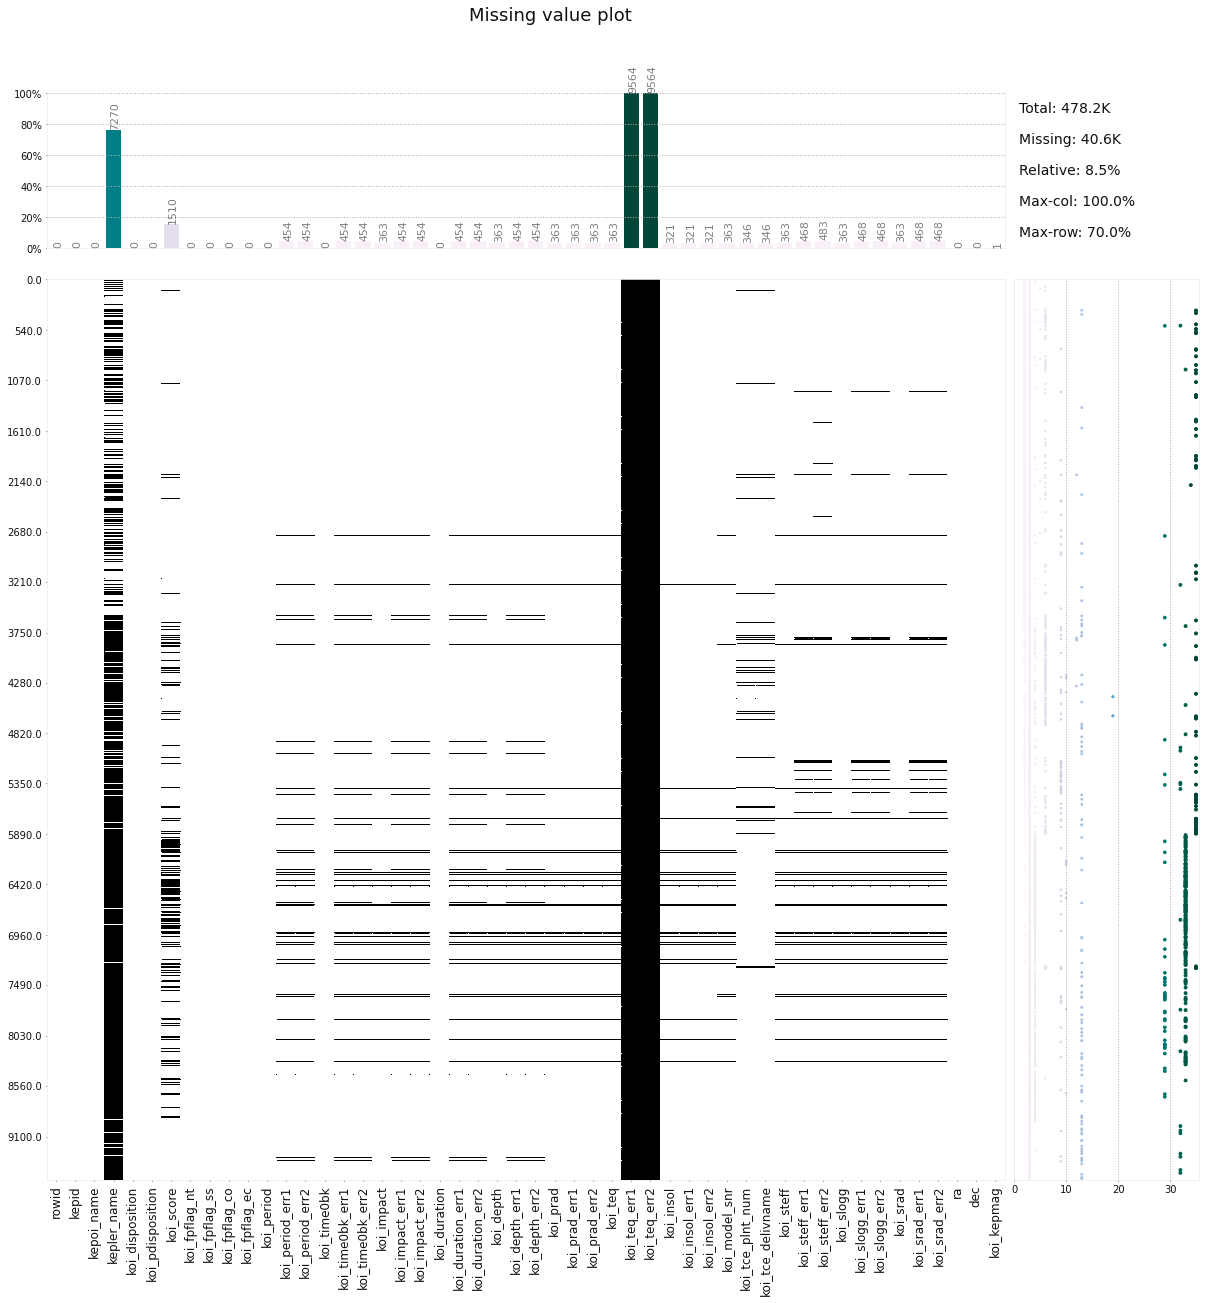

In [9]:
#tentando visualizar os dados faltantes
klib.missingval_plot(dados)

In [10]:
import missingno as msno

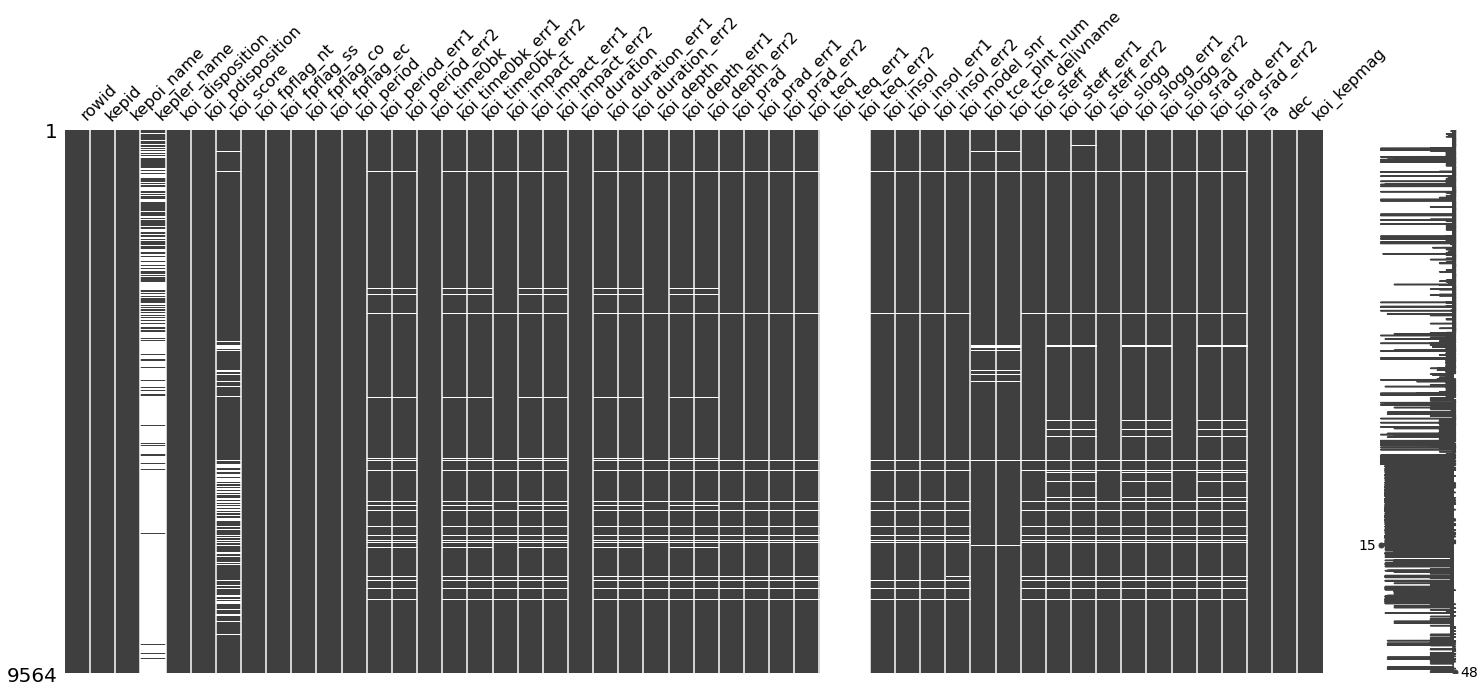

In [11]:
msno.matrix(dados);

In [12]:
#limpando dados com o klib
dados = klib.data_cleaning(dados)

Shape of cleaned data: (9564, 48) - Remaining NAs: 21429

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 2
     of which 0 single valued. (Columns: [])
Dropped missing values: 19128
Reduced memory by at least: 1.65 MB (-45.2%)


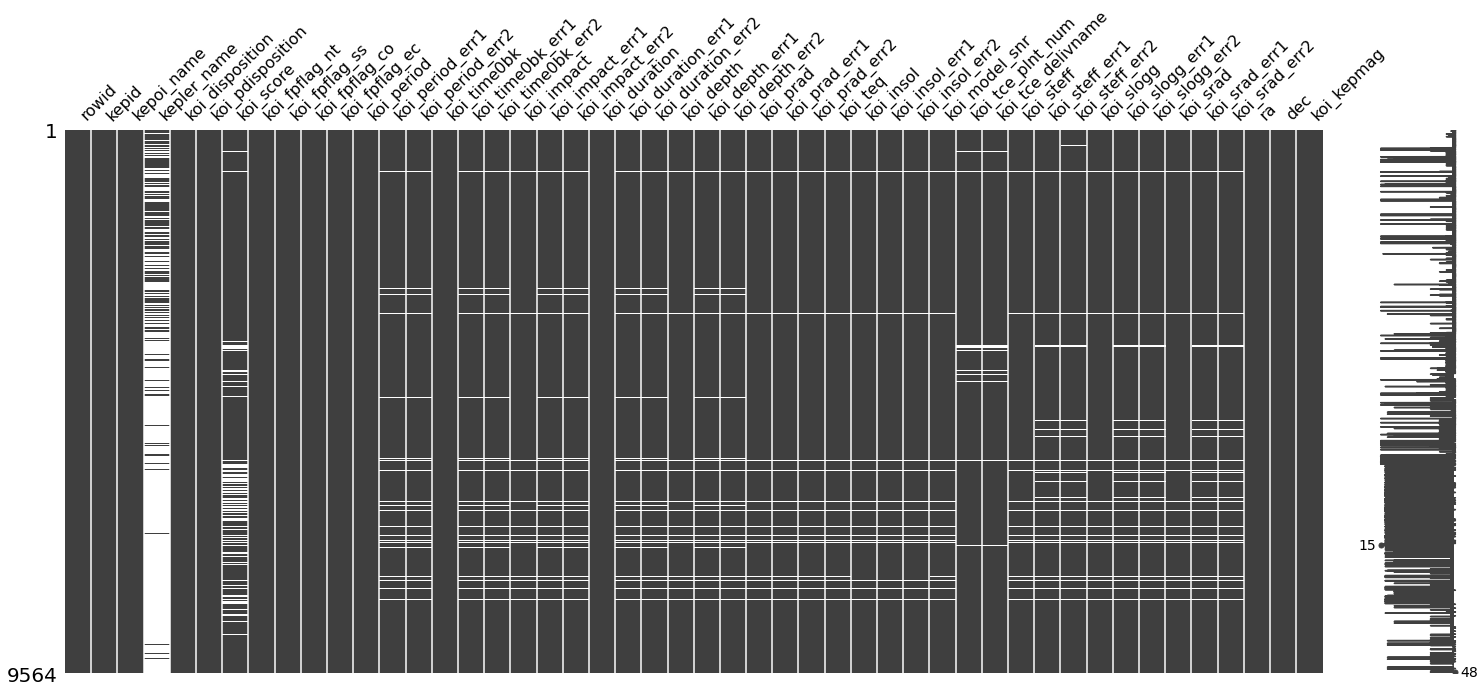

In [13]:
msno.matrix(dados);

In [14]:
from pandas_profiling import ProfileReport

In [15]:
profile = ProfileReport(dados, title='relatório Kepler', explorative=True)

In [16]:
profile.to_file('relatorioKepler.html')

In [20]:
profile.to_notebook_iframe()

In [25]:
import sweetviz as sv

In [26]:
my_report = sv.analyze(dados)

In [27]:
my_report.show_html('relatorioKeplerSweetviz.html')

Report relatorioKeplerSweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [43]:
dados_pycaret = dados.set_index('rowid')[['koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period','koi_time0bk', 'koi_impact',
       'koi_duration','koi_depth','koi_prad','koi_teq', 'koi_insol','koi_model_snr', 
       'koi_tce_plnt_num','koi_tce_delivname', 'koi_steff','koi_slogg','koi_srad',]]

In [44]:
from pycaret.classification import *

In [45]:
df = setup(data=dados_pycaret, target='koi_pdisposition',pca=True)

,Description,Value
0,session_id,7925
1,Target,koi_pdisposition
2,Target Type,Binary
3,Label Encoded,"CANDIDATE: 0, FALSE POSITIVE: 1"
4,Original Data,"(9564, 19)"
5,Missing Values,True
6,Numeric Features,17
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [46]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7426,0.8151,0.7151,0.7794,0.7458,0.4861,0.4881,3.388
gbc,Gradient Boosting Classifier,0.7399,0.8109,0.6979,0.7856,0.7389,0.4817,0.4853,0.472
lightgbm,Light Gradient Boosting Machine,0.7359,0.8078,0.7064,0.7737,0.7384,0.4729,0.4750,0.107
xgboost,Extreme Gradient Boosting,0.7290,0.7973,0.7041,0.7642,0.7327,0.4589,0.4607,0.732
ada,Ada Boost Classifier,0.7283,0.7897,0.6631,0.7890,0.7201,0.4600,0.4670,0.226
rf,Random Forest Classifier,0.7133,0.7827,0.7041,0.7407,0.7217,0.4265,0.4274,1.031
knn,K Neighbors Classifier,0.7127,0.7705,0.7086,0.7372,0.7225,0.4250,0.4255,0.142
et,Extra Trees Classifier,0.7065,0.7738,0.6953,0.7347,0.7143,0.4129,0.4138,0.753
dt,Decision Tree Classifier,0.6600,0.6589,0.6786,0.6778,0.6779,0.3178,0.3181,0.037
ridge,Ridge Classifier,0.6333,0.0000,0.3491,0.8894,0.5012,0.2899,0.3699,0.020


In [47]:
best = automl(optimize = 'AUC', use_holdout = False)
best

In [48]:
modelo = create_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7403,0.8133,0.7175,0.7744,0.7449,0.4812,0.4827
1,0.7403,0.8190,0.7090,0.7795,0.7426,0.4817,0.4839
2,0.7284,0.8031,0.7090,0.7606,0.7339,0.4572,0.4584
3,0.7090,0.7880,0.6582,0.7590,0.7050,0.4207,0.4248
4,0.7459,0.8058,0.7195,0.7815,0.7493,0.4926,0.4943
5,0.7564,0.8300,0.7479,0.7811,0.7641,0.5124,0.5129
6,0.7384,0.8140,0.7195,0.7697,0.7438,0.4772,0.4784
7,0.7339,0.8187,0.7139,0.7660,0.7390,0.4683,0.4696
8,0.7728,0.8228,0.7280,0.8211,0.7718,0.5472,0.5511
9,0.7608,0.8366,0.7288,0.8012,0.7633,0.5227,0.5251


In [49]:
tunado = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7463,0.8257,0.7147,0.7857,0.7485,0.4937,0.4959
1,0.7254,0.8163,0.6921,0.7656,0.7270,0.4521,0.4545
2,0.7299,0.8039,0.7147,0.7598,0.7365,0.4599,0.4608
3,0.7045,0.7900,0.6412,0.7617,0.6963,0.4126,0.4184
4,0.7459,0.8063,0.7139,0.7850,0.7478,0.4929,0.4952
5,0.7862,0.8326,0.7875,0.8035,0.7954,0.5717,0.5718
6,0.7474,0.8190,0.7280,0.7788,0.7526,0.4951,0.4963
7,0.7339,0.8095,0.6969,0.7760,0.7343,0.4694,0.4721
8,0.7788,0.8258,0.7394,0.8233,0.7791,0.5588,0.5621
9,0.7743,0.8434,0.7175,0.8328,0.7709,0.5509,0.5568


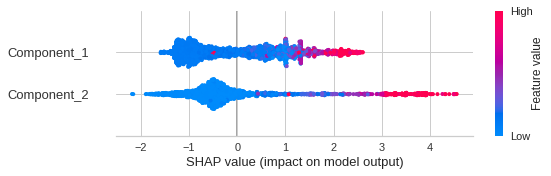

In [50]:
#!pip install shap
interpret_model(modelo)

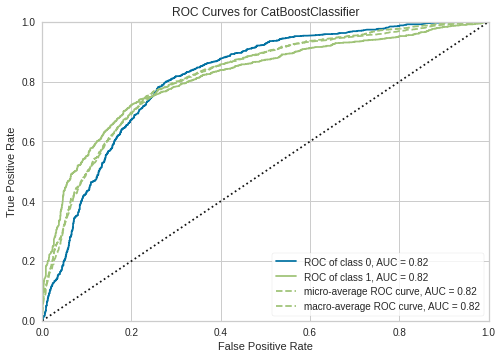

In [51]:
plot_model(tunado)

In [52]:
evaluate_model(tunado)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…